<a href="https://colab.research.google.com/github/Amaali1/T1000-Online-Final-Project/blob/master/TReport.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Sports Recommender Project

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
import pandas as pd
data = pd.read_excel('/content/drive/My Drive/Balanced_Data_After_Removing_Swimming.xlsx')

# Calculate the number of records for each sport class
if all(col in data.columns for col in ['Sport_Ball_Sports', 'Sport_Gymnastics', 'Sport_Strength_Sports']):
    # Sum each column to get the count of records for each sport
    sport_columns = ['Sport_Ball_Sports', 'Sport_Gymnastics', 'Sport_Strength_Sports']
    record_counts = data[sport_columns].sum()

    # Display the results
    print("\nRecord counts for each sport:")
    print(record_counts)

    # Create a summary table for better visualization
    summary_table = pd.DataFrame({'Sport': record_counts.index, 'Record Count': record_counts.values})
    summary_table.reset_index(drop=True, inplace=True)

    # Display the summary table
    print("\nSummary Table:")
    print(summary_table)
else:
    print("One or more sport columns are missing in the dataset.")



Record counts for each sport:
Sport_Ball_Sports        7940
Sport_Gymnastics         7940
Sport_Strength_Sports    7940
dtype: int64

Summary Table:
                   Sport  Record Count
0      Sport_Ball_Sports          7940
1       Sport_Gymnastics          7940
2  Sport_Strength_Sports          7940


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler

# Load the dataset
file_path = '/content/drive/My Drive/Balanced_Data_After_Removing_Swimming.xlsx'
data = pd.read_excel(file_path)

# Define the target column (replace 'Sport' with the correct name if different)
target_column = 'Sport'
X = data.drop(columns=[target_column])  # Features
y = data[target_column]                # Target

# Encode the target variable if it's categorical
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalize the features (this step is optional but recommended)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

print("Data preparation completed successfully!")


Data preparation completed successfully!


**total samples for training and testing**

In [ ]:
# Print shapes of training and testing data
print("Training data shape:", X_train.shape)
print("Testing data shape:", X_test.shape)

# Calculate and display total samples for training and testing
total_training_samples = X_train.shape[0]
total_testing_samples = X_test.shape[0]

print("Total Training Samples:", total_training_samples)
print("Total Testing Samples:", total_testing_samples)

# Display distribution of target labels in training and testing sets
print("Training target distribution:\n", pd.Series(y_train).value_counts())
print("Testing target distribution:\n", pd.Series(y_test).value_counts())


Training data shape: (19056, 12)
Testing data shape: (4764, 12)
Total Training Samples: 19056
Total Testing Samples: 4764
Training target distribution:
 Sport
Sport_Strength_Sports    6352
Sport_Ball_Sports        6352
Sport_Gymnastics         6352
Name: count, dtype: int64
Testing target distribution:
 Sport
Sport_Gymnastics         1588
Sport_Strength_Sports    1588
Sport_Ball_Sports        1588
Name: count, dtype: int64


**To find Best RF Parameters: Fitting 5 folds for each of 243 candidates, totalling 1215 fits** 📌📌📌📌




Fitting 5 folds for each of 243 candidates, totalling 1215 fits
Best Parameters: {'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Tuned Training Accuracy: 96.45%
Tuned Testing Accuracy: 90.07%
Model and metadata saved successfully!
Model and metadata loaded successfully!
Testing Accuracy (Loaded Model): 90.07%
Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.94      0.95      1588
           1       0.85      0.95      0.90      1588
           2       0.91      0.81      0.86      1588

    accuracy                           0.90      4764
   macro avg       0.90      0.90      0.90      4764
weighted avg       0.90      0.90      0.90      4764

Confusion Matrix:
[[1499   30   59]
 [   7 1505   76]
 [  69  232 1287]]


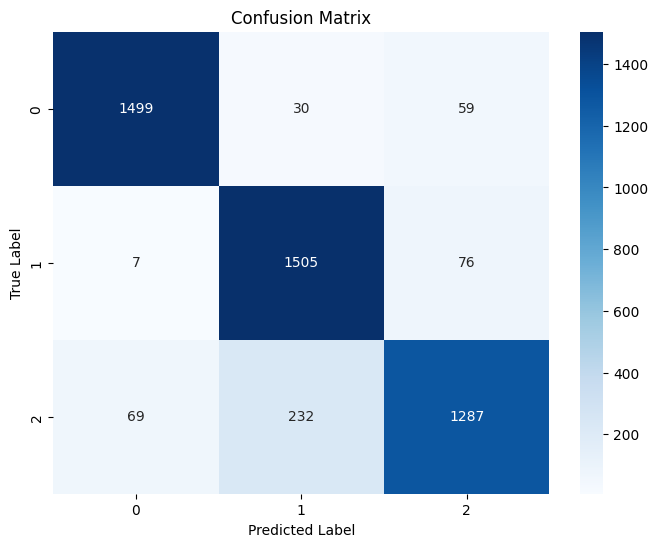

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import joblib

# Define parameter grid
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [5, 10, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 3, 5],
    'max_features': ['sqrt', 'log2', None]
}

# Perform GridSearchCV
grid_search = GridSearchCV(
    RandomForestClassifier(class_weight='balanced', random_state=42),
    param_grid,
    cv=5,
    scoring='accuracy',
    verbose=1,
    n_jobs=-1
)
grid_search.fit(X_train, y_train)

# Retrieve the best model
print("Best Parameters:", grid_search.best_params_)
best_rf_model = grid_search.best_estimator_

# Evaluate the best model
train_accuracy = accuracy_score(y_train, best_rf_model.predict(X_train)) * 100
test_accuracy = accuracy_score(y_test, best_rf_model.predict(X_test)) * 100

print(f"Tuned Training Accuracy: {train_accuracy:.2f}%")
print(f"Tuned Testing Accuracy: {test_accuracy:.2f}%")

# Save the model with metadata
joblib.dump((best_rf_model, X_train.columns, label_encoder), 'best_rf_model_new.pkl')
print("Model and metadata saved successfully!")

# Reload the saved model for evaluation
loaded_rf_model, train_feature_names, loaded_label_encoder = joblib.load('best_rf_model_new.pkl')
print("Model and metadata loaded successfully!")

# Align test data with training features
X_test = X_test[train_feature_names]

# Evaluate the reloaded model
y_pred_test = loaded_rf_model.predict(X_test)
test_accuracy_loaded = accuracy_score(y_test, y_pred_test) * 100
print(f"Testing Accuracy (Loaded Model): {test_accuracy_loaded:.2f}%")

# Display classification report and confusion matrix
print("Classification Report:")
print(classification_report(y_test, y_pred_test))

conf_matrix = confusion_matrix(y_test, y_pred_test)
print("Confusion Matrix:")
print(conf_matrix)

# Plot Confusion Matrix
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()


👍🏼👍🏼👍🏼👍🏼 **The Random Forest model achieves the highest accuracy. 90% 👍🏼👍🏼👍🏼👍🏼**





Tuned Training Accuracy (with all features): 96.45%
Tuned Testing Accuracy (with all features): 90.16%

Classification Report:
                       precision    recall  f1-score   support

    Sport_Ball_Sports       0.95      0.94      0.95      1588
     Sport_Gymnastics       0.85      0.95      0.90      1588
Sport_Strength_Sports       0.91      0.81      0.86      1588

             accuracy                           0.90      4764
            macro avg       0.90      0.90      0.90      4764
         weighted avg       0.90      0.90      0.90      4764


Confusion Matrix:
[[1500   34   54]
 [   8 1504   76]
 [  74  223 1291]]


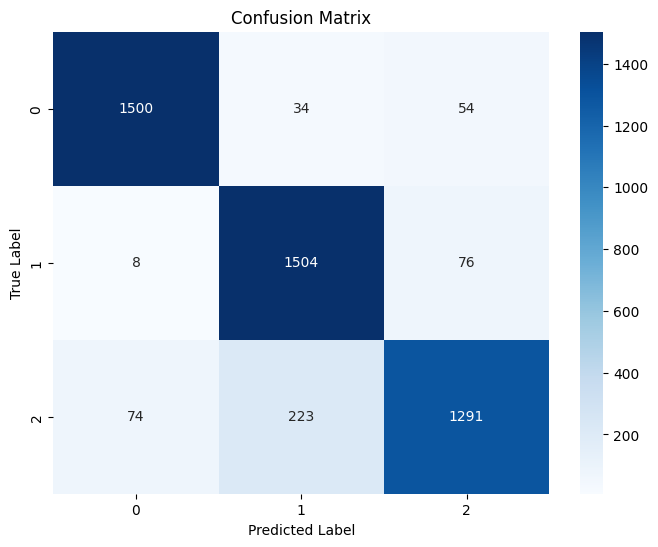

NameError: name 'importance_df' is not defined

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import pandas as pd

# Load the dataset
file_path = '/content/drive/My Drive/Balanced_Data_After_Removing_Swimming.xlsx'
data = pd.read_excel(file_path)

# Split features and target
sport_columns = ['Sport_Ball_Sports', 'Sport_Gymnastics', 'Sport_Strength_Sports']
data['Sport'] = data[sport_columns].idxmax(axis=1)

# Retain all original features (no manual removal)
X = data.drop(columns=['Sport'] + sport_columns)  # Keep all non-target columns
y = data['Sport']

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# Train the Random Forest model with previous best parameters
rf_model = RandomForestClassifier(
    n_estimators=200,
    max_depth=None,
    min_samples_split=2,
    min_samples_leaf=1,
    max_features='sqrt',
    class_weight='balanced',
    random_state=42
)
rf_model.fit(X_train, y_train)

# Evaluate the model
train_accuracy = accuracy_score(y_train, rf_model.predict(X_train)) * 100
test_accuracy = accuracy_score(y_test, rf_model.predict(X_test)) * 100

print(f"Tuned Training Accuracy (with all features): {train_accuracy:.2f}%")
print(f"Tuned Testing Accuracy (with all features): {test_accuracy:.2f}%")

# Classification Report and Confusion Matrix
print("\nClassification Report:")
print(classification_report(y_test, rf_model.predict(X_test)))

print("\nConfusion Matrix:")
conf_matrix = confusion_matrix(y_test, rf_model.predict(X_test))
print(conf_matrix)

# Plot Confusion Matrix
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# Plotting Feature Importance
# Plotting Top Features by Importance
top_features = importance_df.head(8)  # Select top 8 features

plt.figure(figsize=(10, 6))
plt.barh(top_features['Feature'], top_features['Importance'], color='skyblue')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Top 8 Feature Importance')
plt.gca().invert_yaxis()  # Invert y-axis to show the most important feature on top
plt.show()



**The Cross-Validation results show a stable model with a mean accuracy of 90.21% and a low standard deviation of 0.39%, indicating consistent performance across folds. The close match between training (96.45%), testing (90.07%), and CV accuracy confirms there is no overfitting.**

**Cross-Validation** 📌📌📌📌

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
import numpy as np

# Define the Random Forest model with the best parameters
rf_model_cv = RandomForestClassifier(
    n_estimators=200,
    max_depth=None,
    min_samples_split=2,
    min_samples_leaf=1,
    max_features='sqrt',
    class_weight='balanced',
    random_state=42
)

# Perform 5-Fold Cross-Validation
cv_scores = cross_val_score(rf_model_cv, X, y, cv=5, scoring='accuracy', verbose=1)

# Print Cross-Validation results
print(f"Cross-Validation Scores: {cv_scores}")
print(f"Mean CV Accuracy: {np.mean(cv_scores) * 100:.2f}%")
print(f"Standard Deviation of CV Accuracy: {np.std(cv_scores) * 100:.2f}%")


Cross-Validation Scores: [0.90218304 0.90617128 0.89756507 0.9065911  0.89777498]
Mean CV Accuracy: 90.21%
Standard Deviation of CV Accuracy: 0.39%


🍃🍃🍃🍃🍃🍃🍃 **Compare six models of different RF model.**
🍃🍃🍃🍃🍃🍃🍃

* **Multi-Layer Perceptron (MLP)**
* **Deep Neural Network (DNN)**
* **Logistic Regression (LR)**
* **Support Vector Machine (SVM)**
* **K-Nearest Neighbors (KNN)**
* **Gradient Boosting Classifier (GBC)**

**Multi-Layer Perceptron (MLP):** 85% 📌📌📌📌📌📌📌📌

In [ ]:
from sklearn.utils.class_weight import compute_class_weight
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
import numpy as np
import pandas as pd

# Load the new dataset
file_path = '/content/drive/My Drive/Balanced_Data_After_Removing_Swimming.xlsx'
data = pd.read_excel(file_path)

# Define the target column
sport_columns = ['Sport_Ball_Sports', 'Sport_Gymnastics', 'Sport_Strength_Sports']
data['Sport'] = data[sport_columns].idxmax(axis=1)

# Split features and target
X = data.drop(sport_columns + ['Sport'], axis=1)
y = data['Sport']

# Encode the target labels
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

# Compute class weights
class_weights = compute_class_weight('balanced', classes=np.unique(y), y=y)
class_weights = dict(enumerate(class_weights))
print("Class Weights:", class_weights)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalize the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Build the neural network model
model = Sequential()
model.add(Dense(256, activation='relu', input_shape=(X_train.shape[1],)))
model.add(BatchNormalization())
model.add(Dropout(0.3))

model.add(Dense(128, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.2))

model.add(Dense(64, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.2))

# Output layer
model.add(Dense(len(np.unique(y)), activation='softmax'))

# Compile the model
optimizer = Adam(learning_rate=0.001)
model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Train the model with class weights
history = model.fit(
    X_train, y_train,
    epochs=50,
    batch_size=32,
    validation_split=0.2,
    class_weight=class_weights,
    callbacks=[early_stopping],
    verbose=1
)

# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test, verbose=1)
print(f"Test Loss: {loss}, Test Accuracy: {accuracy * 100:.2f}%")

from sklearn.metrics import confusion_matrix, classification_report

y_pred = np.argmax(model.predict(X_test), axis=1)
conf_matrix = confusion_matrix(y_test, y_pred)
print(conf_matrix)

print(classification_report(y_test, y_pred))


Class Weights: {0: 1.0, 1: 1.0, 2: 1.0}
Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


477/477 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.7404 - loss: 0.6154 - val_accuracy: 0.8329 - val_loss: 0.3833
Epoch 2/50
477/477 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8042 - loss: 0.4517 - val_accuracy: 0.8389 - val_loss: 0.3613
Epoch 3/50
477/477 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8189 - loss: 0.4132 - val_accuracy: 0.8492 - val_loss: 0.3503
Epoch 4/50
477/477 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8290 - loss: 0.3985 - val_accuracy: 0.8497 - val_loss: 0.3438
Epoch 5/50
477/477 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8273 - loss: 0.3876 - val_accuracy: 0.8494 - val_loss: 0.3526
Epoch 6/50
477/477 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8265 - loss: 0.3961 - val_accuracy: 0.8507 - val_loss: 0.3418
Epoch 7/50
477/477 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8304 - loss: 0.3888 - val_accuracy: 0.8489 - val_loss: 0.3474
Epoch 8/50
477/477 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8337 - loss: 0.3840 - val_accuracy: 0.8486 - val_

**📌📌📌📌📌📌📌📌📌📌📌📌📌📌📌📌📌 Multi-Class Deep Neural Network (DNN): 85%**

In [ ]:
from sklearn.utils.class_weight import compute_class_weight
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import confusion_matrix, classification_report
import numpy as np
import pandas as pd

# Load the new dataset
file_path = '/content/drive/My Drive/Balanced_Data_After_Removing_Swimming.xlsx'
data = pd.read_excel(file_path)

# Define the target column
sport_columns = ['Sport_Ball_Sports', 'Sport_Gymnastics', 'Sport_Strength_Sports']
data['Sport'] = data[sport_columns].idxmax(axis=1)

# Split features and target
X = data.drop(sport_columns + ['Sport'], axis=1)
y = data['Sport']

# Encode the target labels
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

# Compute class weights
class_weights = compute_class_weight('balanced', classes=np.unique(y), y=y)
class_weights = dict(enumerate(class_weights))
print("Class Weights:", class_weights)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalize the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Build the neural network model with additional layers and neurons
model = Sequential()
model.add(Dense(512, activation='relu', input_shape=(X_train.shape[1],)))
model.add(BatchNormalization())
model.add(Dropout(0.4))

model.add(Dense(256, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.3))

model.add(Dense(128, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.3))

model.add(Dense(64, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.2))

model.add(Dense(32, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.2))

# Output layer
model.add(Dense(len(np.unique(y)), activation='softmax'))

# Compile the model
optimizer = Adam(learning_rate=0.001)
model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Train the model with class weights
history = model.fit(
    X_train, y_train,
    epochs=60,
    batch_size=32,
    validation_split=0.2,
    class_weight=class_weights,
    callbacks=[early_stopping],
    verbose=1
)

# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test, verbose=1)
print(f"Test Loss: {loss}, Test Accuracy: {accuracy * 100:.2f}%")


y_pred = np.argmax(model.predict(X_test), axis=1)
conf_matrix = confusion_matrix(y_test, y_pred)
print(conf_matrix)

print(classification_report(y_test, y_pred))


Class Weights: {0: 1.0, 1: 1.0, 2: 1.0}
Epoch 1/60


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


477/477 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.6824 - loss: 0.7377 - val_accuracy: 0.8353 - val_loss: 0.3784
Epoch 2/60
477/477 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.7939 - loss: 0.4728 - val_accuracy: 0.8455 - val_loss: 0.3623
Epoch 3/60
477/477 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.8156 - loss: 0.4298 - val_accuracy: 0.8434 - val_loss: 0.3584
Epoch 4/60
477/477 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.8153 - loss: 0.4243 - val_accuracy: 0.8423 - val_loss: 0.3517
Epoch 5/60
477/477 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.8145 - loss: 0.4195 - val_accuracy: 0.8489 - val_loss: 0.3481
Epoch 6/60
477/477 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8246 - loss: 0.4222 - val_accuracy: 0.8528 - val_loss: 0.3517
Epoch 7/60
477/477 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.8235 - loss: 0.4090 - val_accuracy: 0.8471 - val_loss: 0.3534
Epoch 8/60
477/477 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.8221 - loss: 0.4039 - val_accuracy: 0.8505 - val_

In [ ]:
pip install scikeras


**Logistic Regression (LR)**: 82%

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Create and train the Logistic Regression model
lr_model = LogisticRegression(random_state=42, max_iter=1000)
lr_model.fit(X_train, y_train)

# Make predictions
y_pred_lr = lr_model.predict(X_test)

# Evaluate the model
lr_accuracy = accuracy_score(y_test, y_pred_lr)
print(f"Logistic Regression Accuracy: {lr_accuracy * 100:.2f}%")
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_lr))
print("Classification Report:")
print(classification_report(y_test, y_pred_lr))


Logistic Regression Accuracy: 82.49%
Confusion Matrix:
[[1458   36   75]
 [  28 1311  272]
 [  68  355 1161]]
Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.93      0.93      1569
           1       0.77      0.81      0.79      1611
           2       0.77      0.73      0.75      1584

    accuracy                           0.82      4764
   macro avg       0.83      0.83      0.83      4764
weighted avg       0.83      0.82      0.82      4764



**Support Vector Machine (SVM)** 85% 📌

In [ ]:
from sklearn.svm import SVC

# Create and train the Support Vector Machine model
svm_model = SVC(kernel='rbf', probability=True, random_state=42)
svm_model.fit(X_train, y_train)

# Make predictions
y_pred_svm = svm_model.predict(X_test)

# Evaluate the model
svm_accuracy = accuracy_score(y_test, y_pred_svm)
print(f"Support Vector Machine Accuracy: {svm_accuracy * 100:.2f}%")
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_svm))
print("Classification Report:")
print(classification_report(y_test, y_pred_svm))


Support Vector Machine Accuracy: 84.82%
Confusion Matrix:
[[1465   38   66]
 [  26 1456  129]
 [  59  405 1120]]
Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.93      0.94      1569
           1       0.77      0.90      0.83      1611
           2       0.85      0.71      0.77      1584

    accuracy                           0.85      4764
   macro avg       0.85      0.85      0.85      4764
weighted avg       0.85      0.85      0.85      4764



**K-Nearest Neighbors (KNN)**: 87% 📌

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

# Create and train the K-Nearest Neighbors model
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train, y_train)

# Make predictions
y_pred_knn = knn_model.predict(X_test)

# Evaluate the model
knn_accuracy = accuracy_score(y_test, y_pred_knn)
print(f"K-Nearest Neighbors Accuracy: {knn_accuracy * 100:.2f}%")
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_knn))
print("Classification Report:")
print(classification_report(y_test, y_pred_knn))


K-Nearest Neighbors Accuracy: 86.59%
Confusion Matrix:
[[1462   46   61]
 [  28 1453  130]
 [  78  296 1210]]
Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.93      0.93      1569
           1       0.81      0.90      0.85      1611
           2       0.86      0.76      0.81      1584

    accuracy                           0.87      4764
   macro avg       0.87      0.87      0.87      4764
weighted avg       0.87      0.87      0.87      4764



**Gradient Boosting Classifier (GBC)**: 87%

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

# Create and train the Gradient Boosting Classifier model
gbc_model = GradientBoostingClassifier(random_state=42)
gbc_model.fit(X_train, y_train)

# Make predictions
y_pred_gbc = gbc_model.predict(X_test)

# Evaluate the model
gbc_accuracy = accuracy_score(y_test, y_pred_gbc)
print(f"Gradient Boosting Classifier Accuracy: {gbc_accuracy * 100:.2f}%")
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_gbc))
print("Classification Report:")
print(classification_report(y_test, y_pred_gbc))


Gradient Boosting Classifier Accuracy: 87.34%
Confusion Matrix:
[[1469   40   60]
 [  29 1454  128]
 [  62  284 1238]]
Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.94      0.94      1569
           1       0.82      0.90      0.86      1611
           2       0.87      0.78      0.82      1584

    accuracy                           0.87      4764
   macro avg       0.88      0.87      0.87      4764
weighted avg       0.88      0.87      0.87      4764



<ipython-input-80-eaccd87b34c4>:35: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


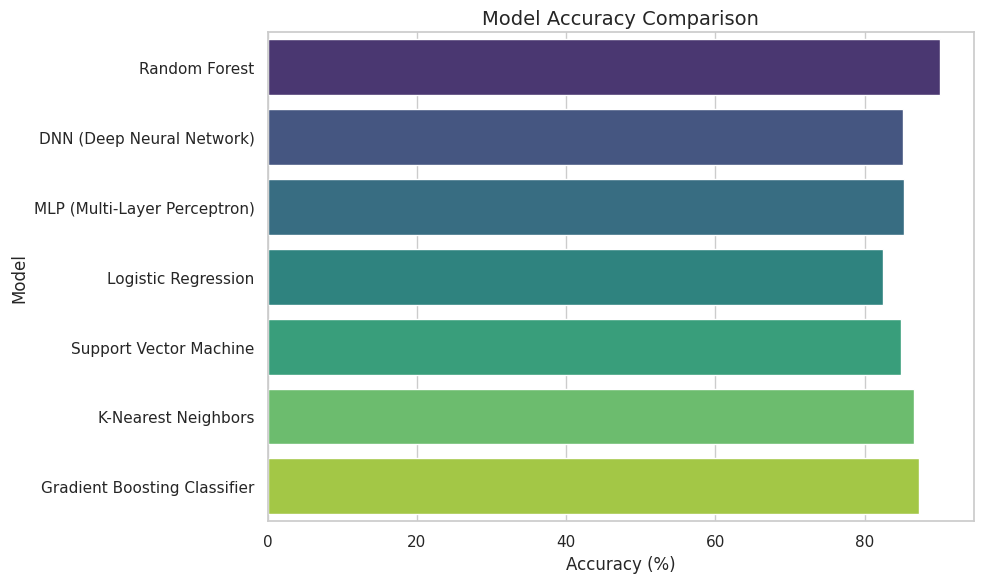

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Data
model_accuracies = {
    "Model": [
        "Random Forest",
        "DNN (Deep Neural Network)",
        "MLP (Multi-Layer Perceptron)",
        "Logistic Regression",
        "Support Vector Machine",
        "K-Nearest Neighbors",
        "Gradient Boosting Classifier"
    ],
    "Accuracy (%)": [
        90.14,
        85.12,
        85.33,
        82.49,
        84.82,
        86.59,
        87.34
    ]
}

# Convert to a pandas DataFrame
accuracy_table = pd.DataFrame(model_accuracies)

# Create a styled table using Seaborn
plt.figure(figsize=(10, 6))
sns.set_theme(style="whitegrid")

# Bar plot for better visualization
sns.barplot(
    data=accuracy_table,
    y="Model",
    x="Accuracy (%)",
    palette="viridis"
)

# Add titles and labels
plt.title("Model Accuracy Comparison", fontsize=14)
plt.xlabel("Accuracy (%)", fontsize=12)
plt.ylabel("Model", fontsize=12)

# Display the plot
plt.tight_layout()
plt.show()


⏰⏰⏰⏰⏰⏰⏰⏰⏰

**Statistical test: Kruskal-Wallis Test that shows that there are Significant differences among the classes in [ Height, Weight, Age, BMI, gender]**

In [ ]:
# Define the sport columns
sport_columns = ['Sport_Ball_Sports', 'Sport_Gymnastics', 'Sport_Strength_Sports']

from scipy.stats import kruskal

# Define the columns to test, including 'Sex_1'
columns_to_test = ['Height', 'Weight', 'Age', 'BMI', 'Gender']

# Initialize an empty dictionary to store test results
kruskal_results = {}

# Perform Kruskal-Wallis test for each column
for column in columns_to_test:
    groups = [data[data[sport] == 1][column] for sport in sport_columns]  # Group by each sport category
    stat, p_value = kruskal(*groups)  # Perform the test

    # Store the results
    kruskal_results[column] = {
        'Test Statistic': stat,
        'P-value': p_value,
        'Result': 'Significant difference between classes' if p_value < 0.05 else 'No significant difference between groups'
    }

# Display the results
print("Kruskal-Wallis Test Results:")
for column, result in kruskal_results.items():
    print(f"Column: {column}")
    print(f"  Test Statistic: {result['Test Statistic']:.4f}")
    print(f"  P-value: {result['P-value']:.4f}")
    print(f"  Result: {result['Result']}\n")

Kruskal-Wallis Test Results:
Column: Height
  Test Statistic: 9951.2935
  P-value: 0.0000
  Result: Significant difference between classes

Column: Weight
  Test Statistic: 10806.2785
  P-value: 0.0000
  Result: Significant difference between classes

Column: Age
  Test Statistic: 3740.9924
  P-value: 0.0000
  Result: Significant difference between classes

Column: BMI
  Test Statistic: 6528.9170
  P-value: 0.0000
  Result: Significant difference between classes

Column: Gender
  Test Statistic: 2693.4862
  P-value: 0.0000
  Result: Significant difference between classes



<ipython-input-7-7bda6f7035d5>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=kruskal_df.index, y=kruskal_df['Test Statistic'], palette='viridis')


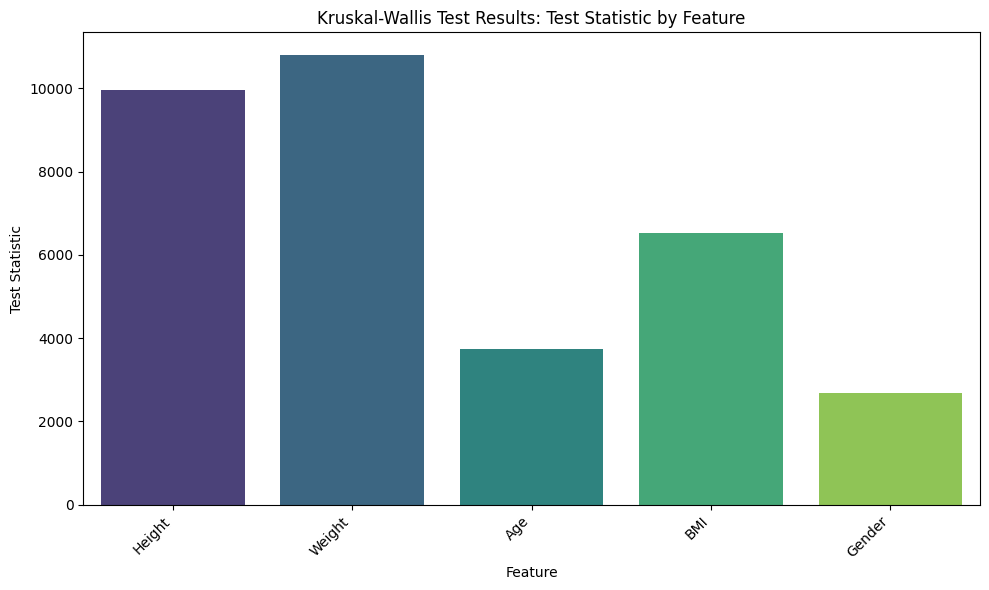

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Convert Kruskal-Wallis test results into a DataFrame for plotting
kruskal_df = pd.DataFrame.from_dict(kruskal_results, orient='index')

# Plotting the Kruskal-Wallis Test Results
plt.figure(figsize=(10, 6))
sns.barplot(x=kruskal_df.index, y=kruskal_df['Test Statistic'], palette='viridis')
plt.title('Kruskal-Wallis Test Results: Test Statistic by Feature')
plt.xlabel('Feature')
plt.ylabel('Test Statistic')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


🌸🌸🌸🌸🌸🌸🌸🌸

**We conduct Mann-Whitney U Tests for pairwise comparisons across the classes (sports) for the following columns: Height, Weight, Age, BMI, and Gender. These tests will help identify whether there are statistically significant differences between pairs of sports for each feature.**

**The Mann-Whitney U Test is a non-parametric statistical test used to compare differences between two independent groups when the dependent variable is either ordinal or continuous but not normally distributed. The results will include the test statistic and the corresponding p-value for each pairwise comparison.**


In [ ]:
from scipy.stats import mannwhitneyu

# Columns to test
columns_to_test = ['Height', 'Weight', 'Age', 'BMI', 'Gender']

# Perform pairwise Mann-Whitney U tests for each column
for column in columns_to_test:
    print(f"\nMann-Whitney U Test Results for {column}:\n")
    for i in range(len(sport_columns)):
        for j in range(i + 1, len(sport_columns)):
            sport1 = sport_columns[i]
            sport2 = sport_columns[j]

            # Extract data for the two sports
            group1 = data.loc[data[sport1] == 1, column]
            group2 = data.loc[data[sport2] == 1, column]

            # Perform the test
            stat, p = mannwhitneyu(group1, group2, alternative='two-sided')

            # Print results
            print(f"{sport1} vs {sport2}:")
            print(f"  Statistic: {stat:.4f}, P-value: {p:.4e}")



Mann-Whitney U Test Results for Height:

Sport_Ball_Sports vs Sport_Gymnastics:
  Statistic: 56465535.0000, P-value: 0.0000e+00
Sport_Ball_Sports vs Sport_Strength_Sports:
  Statistic: 52114414.5000, P-value: 0.0000e+00
Sport_Gymnastics vs Sport_Strength_Sports:
  Statistic: 16067445.0000, P-value: 0.0000e+00

Mann-Whitney U Test Results for Weight:

Sport_Ball_Sports vs Sport_Gymnastics:
  Statistic: 60048233.0000, P-value: 0.0000e+00
Sport_Ball_Sports vs Sport_Strength_Sports:
  Statistic: 41171883.0000, P-value: 3.4451e-245
Sport_Gymnastics vs Sport_Strength_Sports:
  Statistic: 10400766.5000, P-value: 0.0000e+00

Mann-Whitney U Test Results for Age:

Sport_Ball_Sports vs Sport_Gymnastics:
  Statistic: 45642183.0000, P-value: 0.0000e+00
Sport_Ball_Sports vs Sport_Strength_Sports:
  Statistic: 28702508.0000, P-value: 1.2393e-22
Sport_Gymnastics vs Sport_Strength_Sports:
  Statistic: 15433009.5000, P-value: 0.0000e+00

Mann-Whitney U Test Results for BMI:

Sport_Ball_Sports vs Sport_

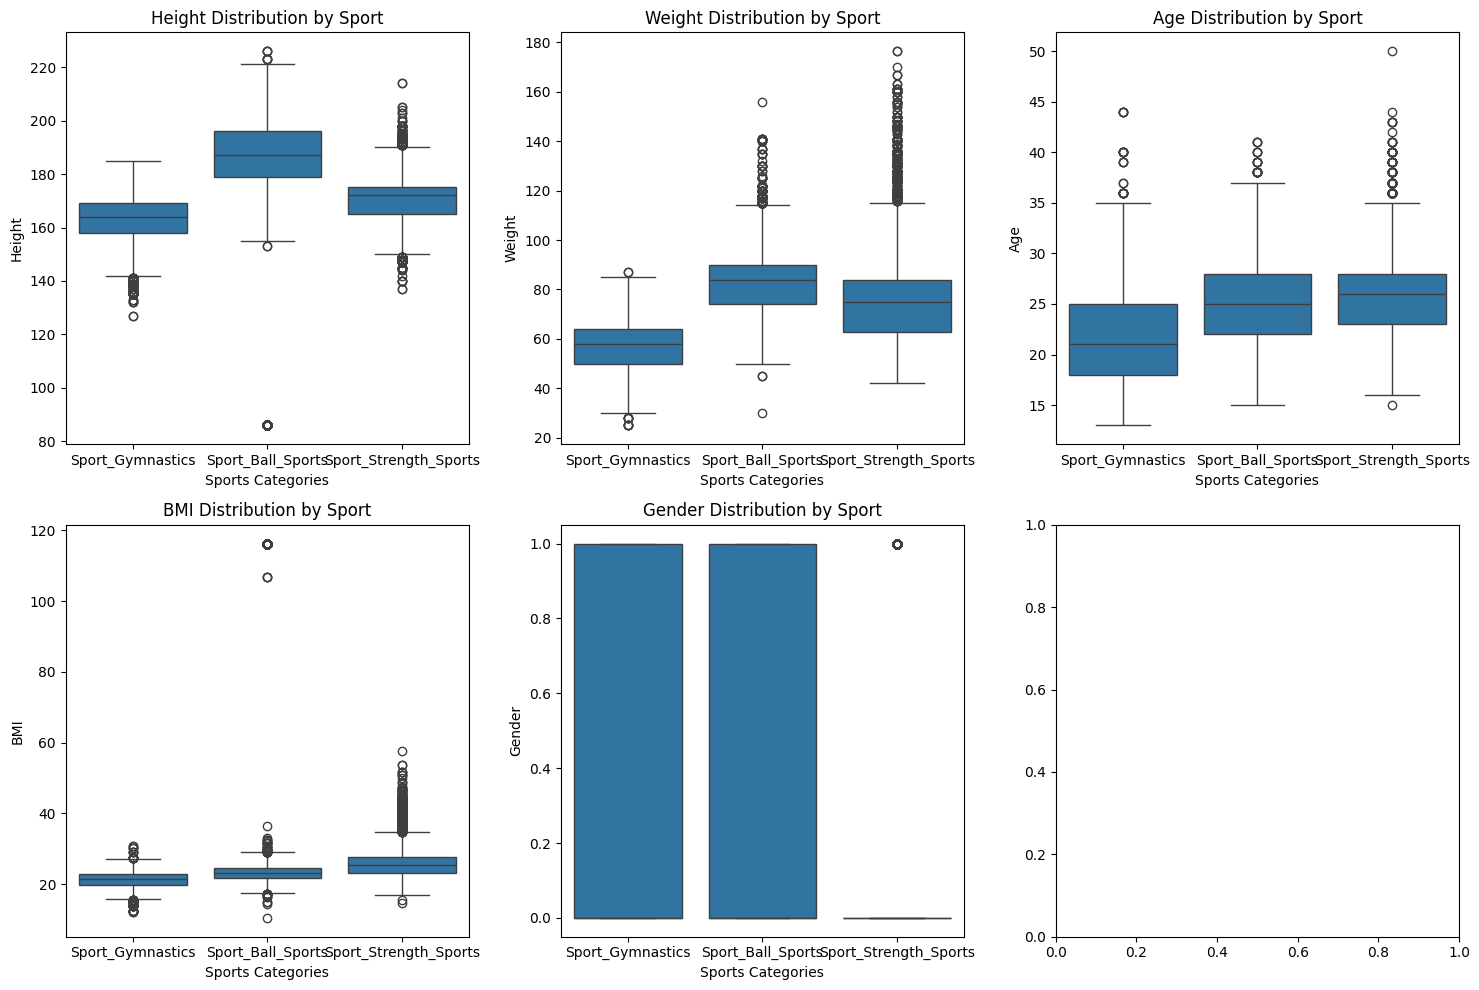

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Prepare the data for plotting
# Assuming the data contains columns for each feature (e.g., 'Height', 'Weight', etc.) and a 'Sport' column to indicate the sport type
data['Sport'] = data[sport_columns].idxmax(axis=1)  # Assuming sport columns contain binary values for each sport

# Create a figure with subplots for each feature
features = ['Height', 'Weight', 'Age', 'BMI', 'Gender']
fig, axes = plt.subplots(2, 3, figsize=(15, 10))

# Flatten axes array for easier iteration
axes = axes.flatten()

# Plot boxplots for each feature
for i, feature in enumerate(features):
    sns.boxplot(x='Sport', y=feature, data=data, ax=axes[i])
    axes[i].set_title(f'{feature} Distribution by Sport')
    axes[i].set_xlabel('Sports Categories')
    axes[i].set_ylabel(feature)

# Adjust the layout
plt.tight_layout()

# Show the plot
plt.show()


**Done** 🍃